Perform EDA on the dataset to understand the distribution of the data and identify any trends or patterns.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.filterwarnings(action='once')

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
#Raw content URL for loan_approval_dataset.csv
url = "https://raw.githubusercontent.com/hastighsh/Credit-Card-Loan-Prediction/main/loan_approval_dataset.csv"

#Read the data into a DataFrame
df = pd.read_csv(url, delimiter=',')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
#checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
# dropping loan_id from the dataset since it has no value to the training
df.drop(columns="loan_id", inplace=True)

# removing the space before the column names in the rest of the dataset
df.rename(columns=lambda x: x.strip(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [8]:
# # Create a LabelEncoder instance
label_encoder = LabelEncoder()
# 
# # Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])
# 
# # Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
# 
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
# #changing the data type of the column to int64 from int32
df['education'] = df['education'].astype('int64')
df['self_employed'] = df['self_employed'].astype('int64')
df['loan_status'] = df['loan_status'].astype('int64')

In [9]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


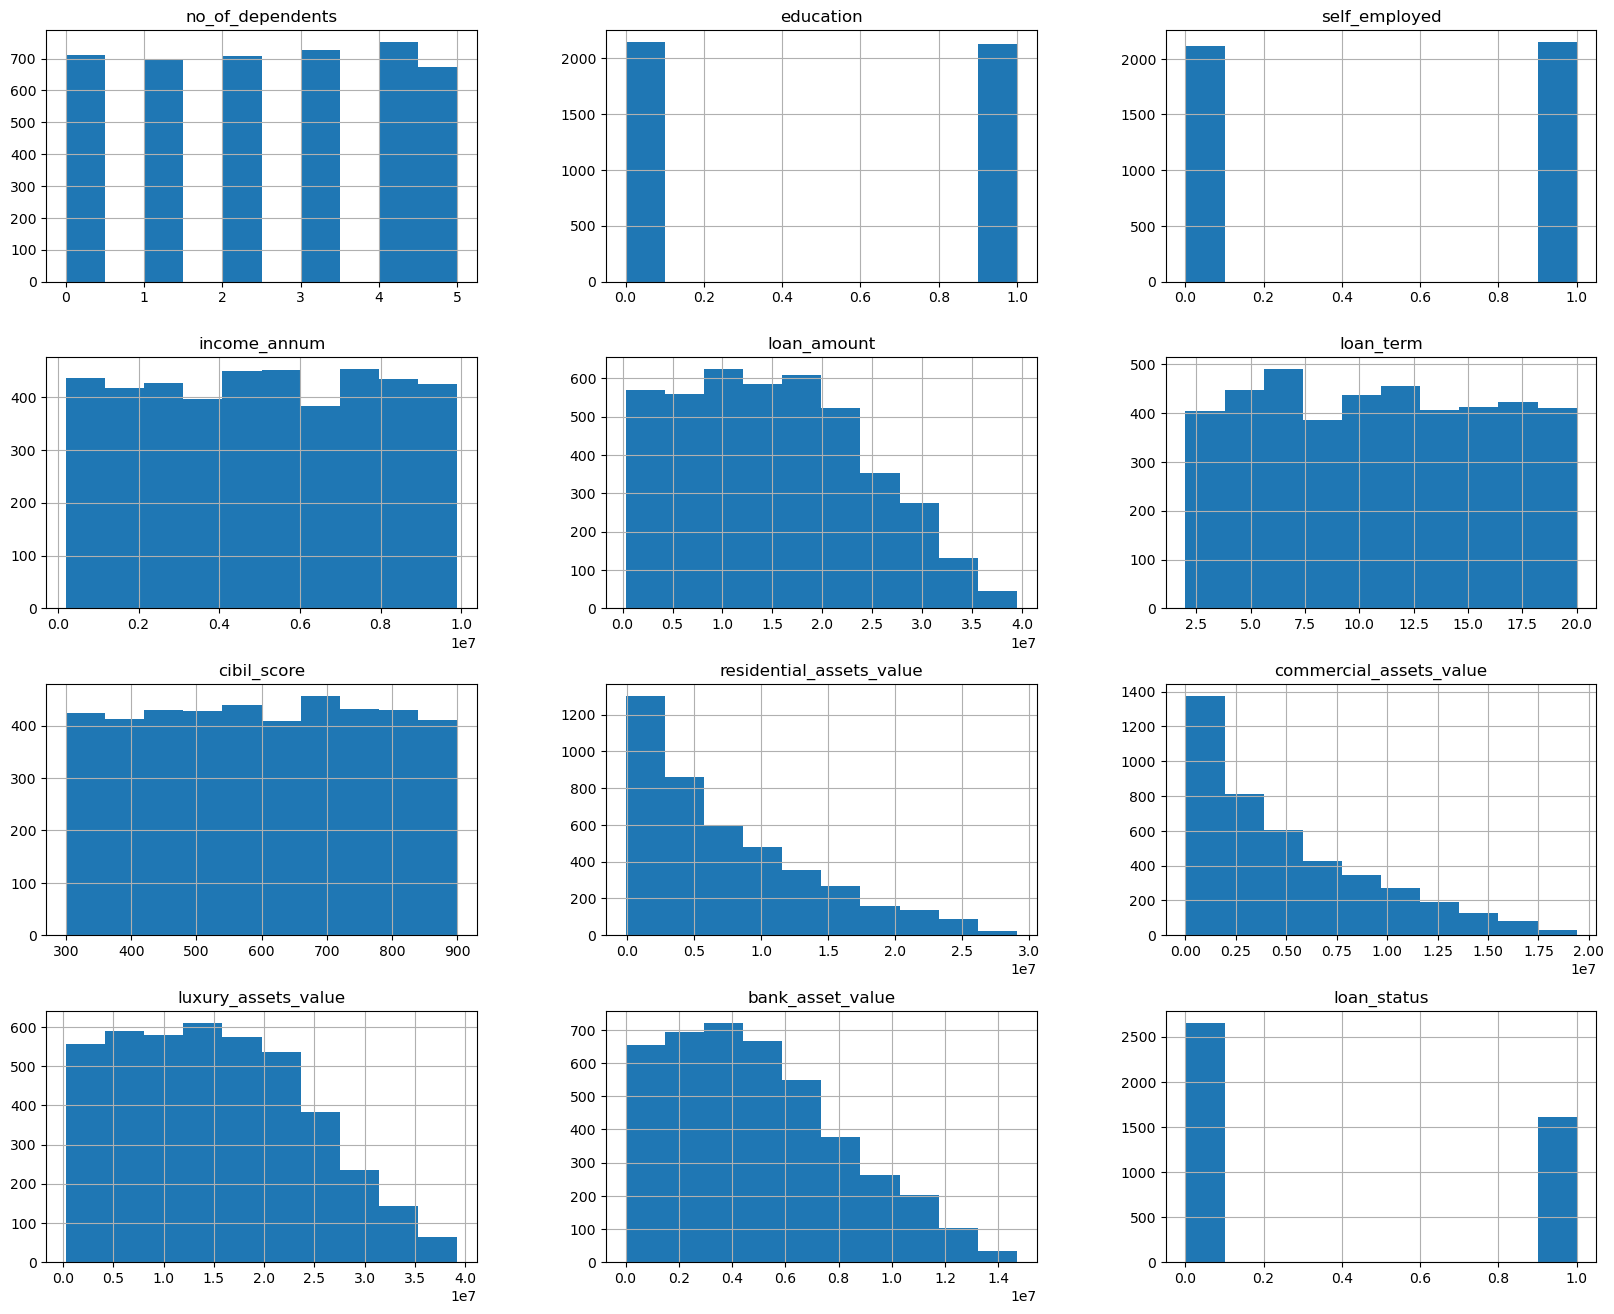

In [11]:
# plotting a histogram of the data using hist()
df.hist(figsize=(20, 16))
plt.show()

<Figure size 800x640 with 0 Axes>

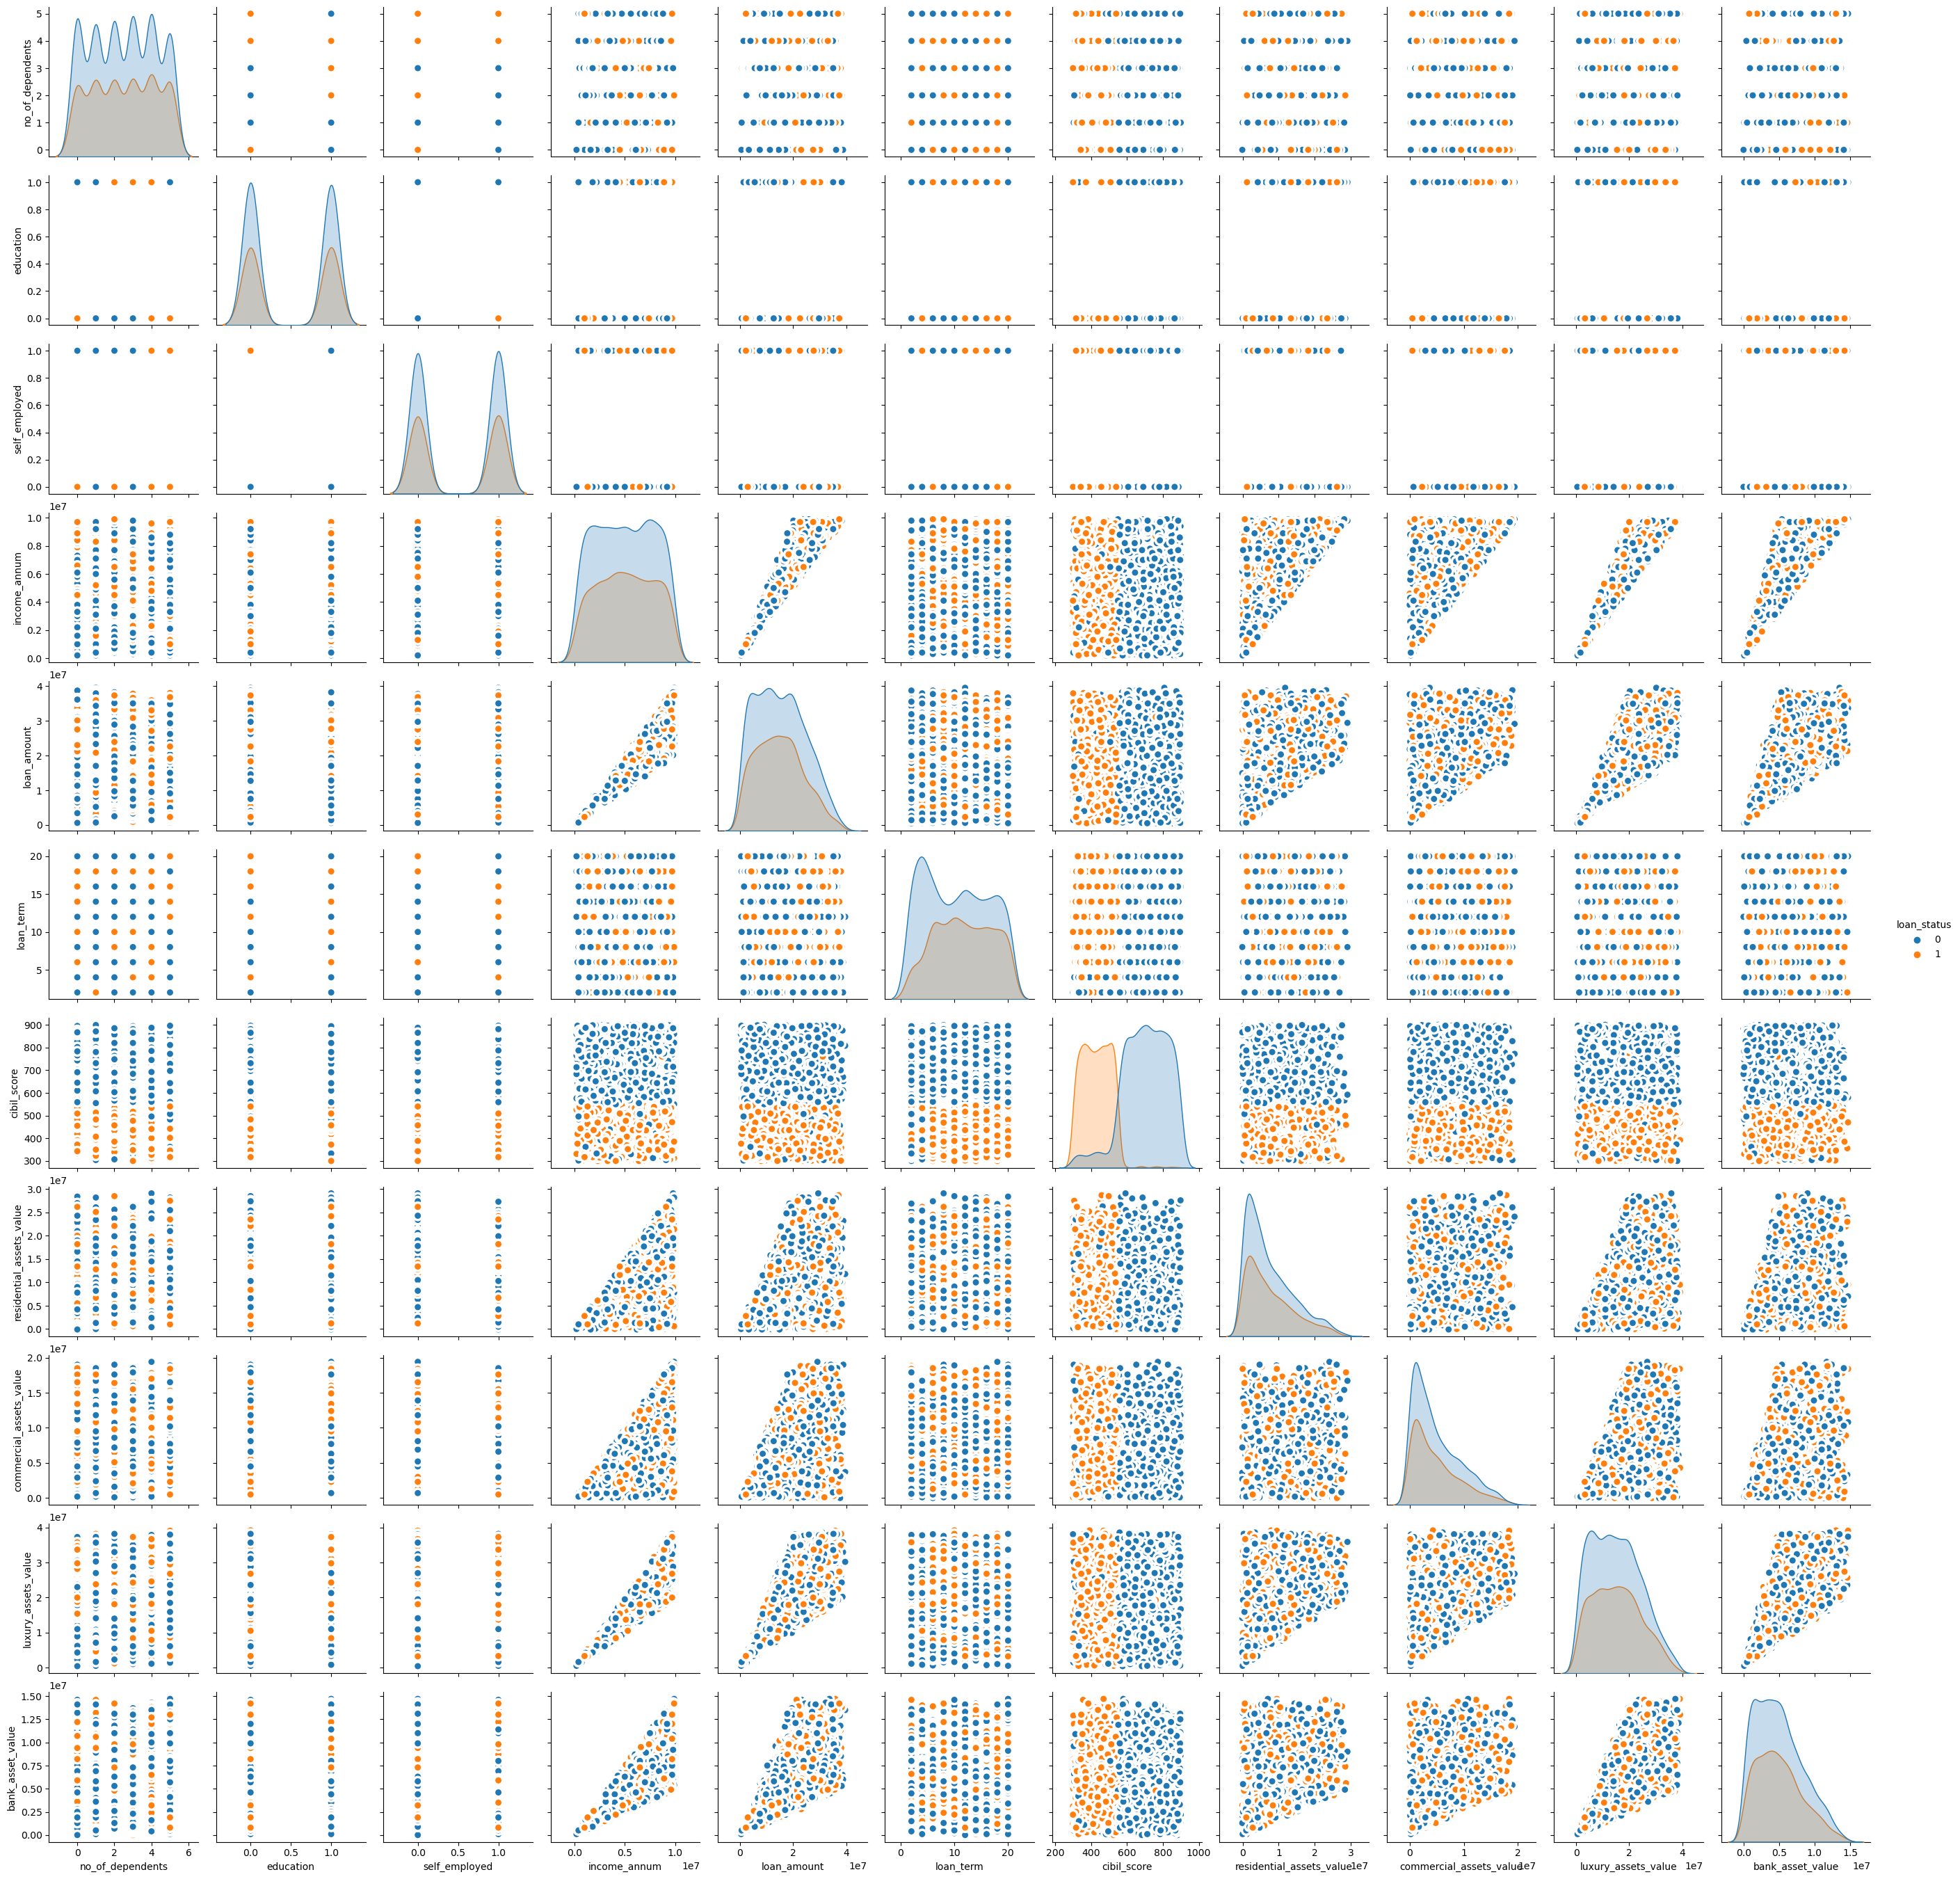

In [12]:
# Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables.
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), hue='loan_status')
plt.show()

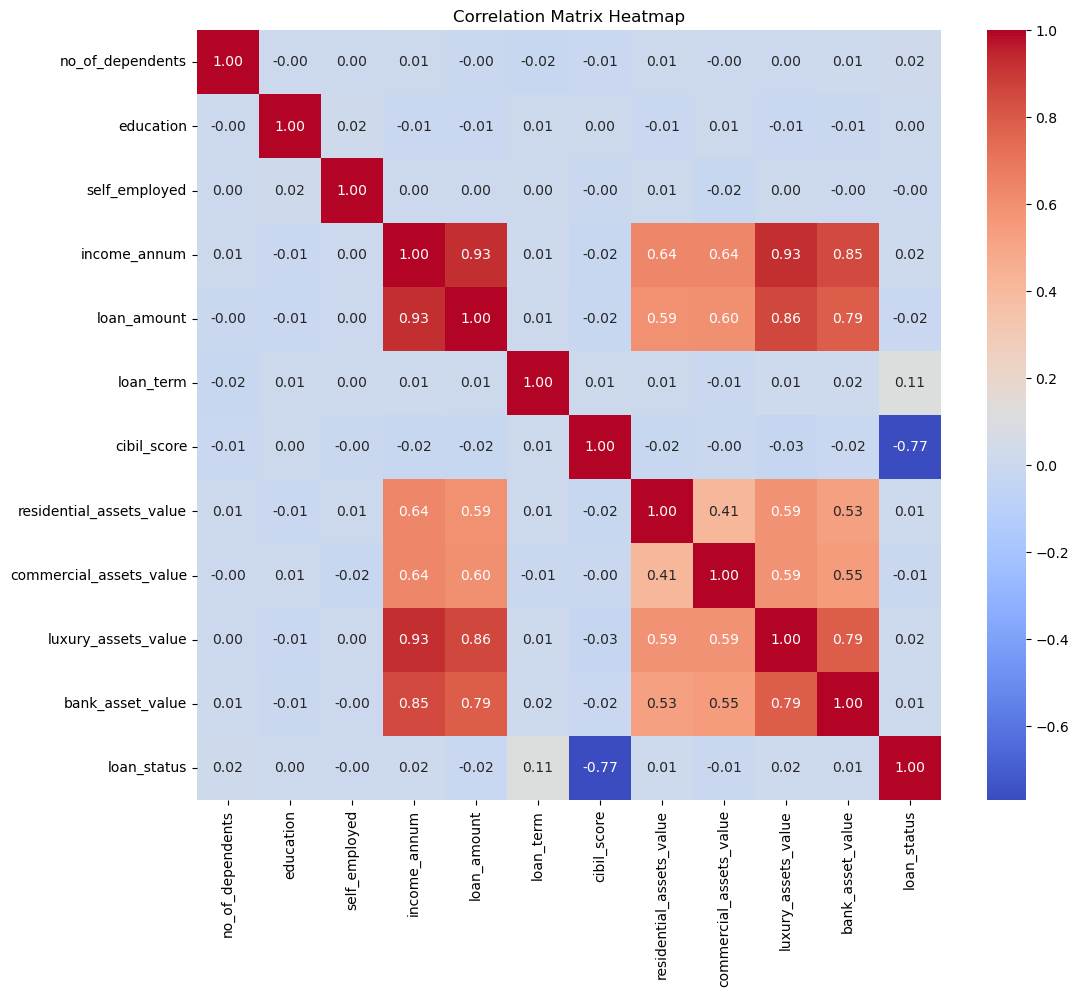

In [14]:
# Plotting Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
# importing the libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

In [16]:
# Define the numeric columns
X = df.drop('loan_status',axis=1)
y = df['loan_status']
num_cols = X.select_dtypes(include='number').columns.to_list()
# cat_cols = X.select_dtypes(exclude='number').columns.to_list()

In [17]:
# Create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

In [18]:
#Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols)],
#         ('cat', categorical_transformer, cat_cols)],
         remainder='passthrough'
)

In [19]:
# Create and apply the preprocessing pipeline
data_prepared = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

This cell below is for feature selection

In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#inital the estimator as RandomForestClassifier
y = y.ravel()
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
#use RFE to choose the attribute
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(data_prepared, y)
#get attributes' name
selected_features = data_prepared.columns[selector.support_]

The cell below is a generic function to calculate accuracy of our training models to find the best training process

In [22]:
#generic function to calculate accuracy
#inputs: model, model_name, y_test, X_test, X_train, y_train

def calculate_accuracy_classifier(model, model_name, y_test, X_test, X_train, y_train):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()

    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Mean Absolute Error: {mae}')
    print(f'{model_name} Mean Squared Error: {mse}')
    print(f'{model_name} R-squared: {r2}')
    print(f'{model_name} Confusion Matrix:\n{conf_matrix}')
    print(f'{model_name} Classification Report:\n{class_report}')
    print(f'{model_name} Cross-Validation Mean Accuracy: {mean_score}')

    # Plot a heatmap of the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

The cells below are for 3 different training which are: logistic regression, xgboost, random forest and calculating accuracy of each of them

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'data_prepared' is your feature matrix and 'y' is your target variable
# Replace 'selected_features' with the actual features you want to use for prediction
X = data_prepared[selected_features]
y = y.ravel()

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (2561, 5), Validation set: (854, 5), Test set: (854, 5)


In [24]:
#Train a logistic regression model and evaluate its performance on validation and test sets.
#inputs: X_train, y_train: Training data and labels | X_val, y_val: Validation data and labels

def logistic_regression(X_train, y_train, X_val, y_val):

    # Initialize the logistic regression model
    logreg_model = LogisticRegression()

    # Train the logistic regression model on the training set
    logreg_model.fit(X_train, y_train)

    # Calculate accuracy and other metrics on the validation set
    calculate_accuracy_classifier(logreg_model, "Logistic Regression (Validation)", y_val, X_val, X_train, y_train)

In [25]:
#Train an XGBoost model and evaluate its performance on validation and test sets.
#inputs: X_train, y_train: Training data and labels | X_val, y_val: Validation data and labels

def xgboost(X_train, y_train, X_val, y_val):

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier()

    # Train the XGBoost model on the training set
    xgb_model.fit(X_train, y_train)

    # Calculate accuracy and other metrics on the validation set
    calculate_accuracy_classifier(xgb_model, "XGBoost (Validation)", y_val, X_val, X_train, y_train)
    
    return xgb_model

In [26]:
#Train a Random Forest model and evaluate its performance on validation and test sets.
#inputs: X_train, y_train: Training data and labels | X_val, y_val: Validation data and labels

def random_forest(X_train, y_train, X_val, y_val):

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest model on the training set
    rf_model.fit(X_train, y_train)

    # Calculate accuracy and other metrics on the validation set
    calculate_accuracy_classifier(rf_model, "Random Forest (Validation)", y_val, X_val, X_train, y_train)
    
    return rf_model

Logistic Regression (Validation) Accuracy: 0.914519906323185
Logistic Regression (Validation) Mean Absolute Error: 0.08548009367681499
Logistic Regression (Validation) Mean Squared Error: 0.08548009367681499
Logistic Regression (Validation) R-squared: 0.6436235587339152
Logistic Regression (Validation) Confusion Matrix:
[[480  33]
 [ 40 301]]
Logistic Regression (Validation) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       513
           1       0.90      0.88      0.89       341

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Logistic Regression (Validation) Cross-Validation Mean Accuracy: 0.9265975268031189


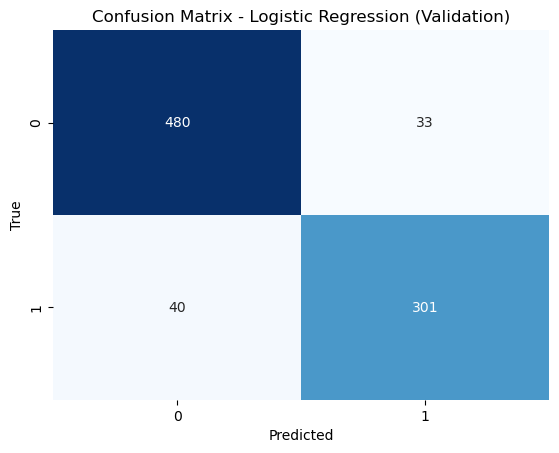

In [27]:
logistic_regression(X_train, y_train, X_val, y_val)

XGBoost (Validation) Accuracy: 0.9812646370023419
XGBoost (Validation) Mean Absolute Error: 0.01873536299765808
XGBoost (Validation) Mean Squared Error: 0.01873536299765808
XGBoost (Validation) R-squared: 0.9218900950649678
XGBoost (Validation) Confusion Matrix:
[[508   5]
 [ 11 330]]
XGBoost (Validation) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       513
           1       0.99      0.97      0.98       341

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

XGBoost (Validation) Cross-Validation Mean Accuracy: 0.9816497624269006


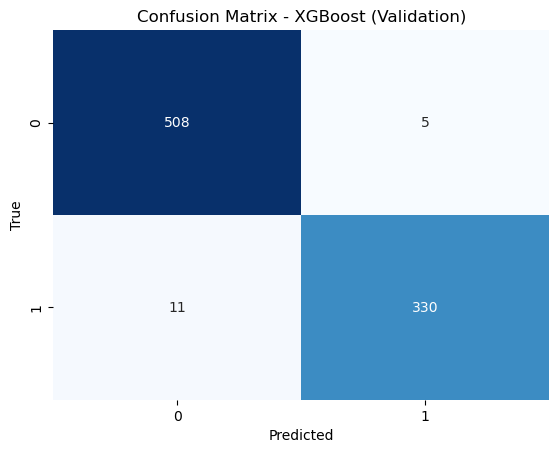

In [28]:
xg_model = xgboost(X_train, y_train, X_val, y_val)

Random Forest (Validation) Accuracy: 0.9824355971896955
Random Forest (Validation) Mean Absolute Error: 0.01756440281030445
Random Forest (Validation) Mean Squared Error: 0.01756440281030445
Random Forest (Validation) R-squared: 0.9267719641234072
Random Forest (Validation) Confusion Matrix:
[[510   3]
 [ 12 329]]
Random Forest (Validation) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       513
           1       0.99      0.96      0.98       341

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Random Forest (Validation) Cross-Validation Mean Accuracy: 0.9796966374269006


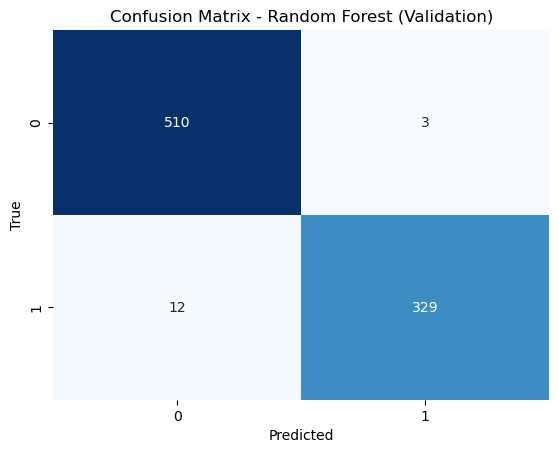

In [29]:
rf_model = random_forest(X_train, y_train, X_val, y_val)

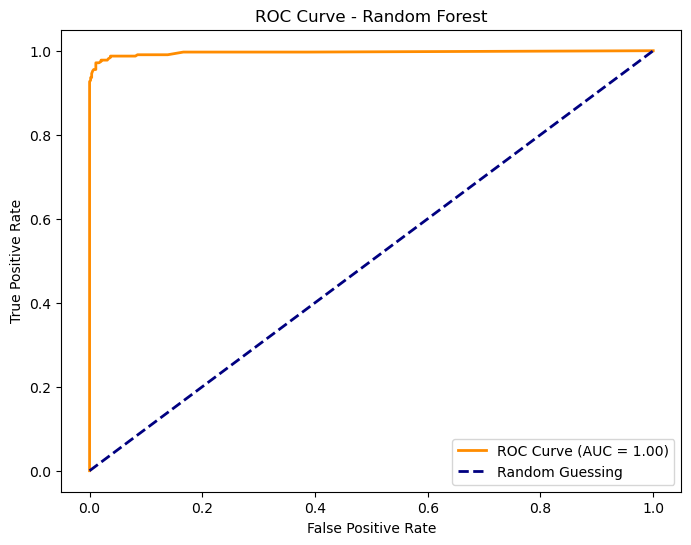

In [30]:
from sklearn.metrics import roc_curve, auc

# Assuming 'random_forest_model' is your trained Random Forest model
y_scores = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


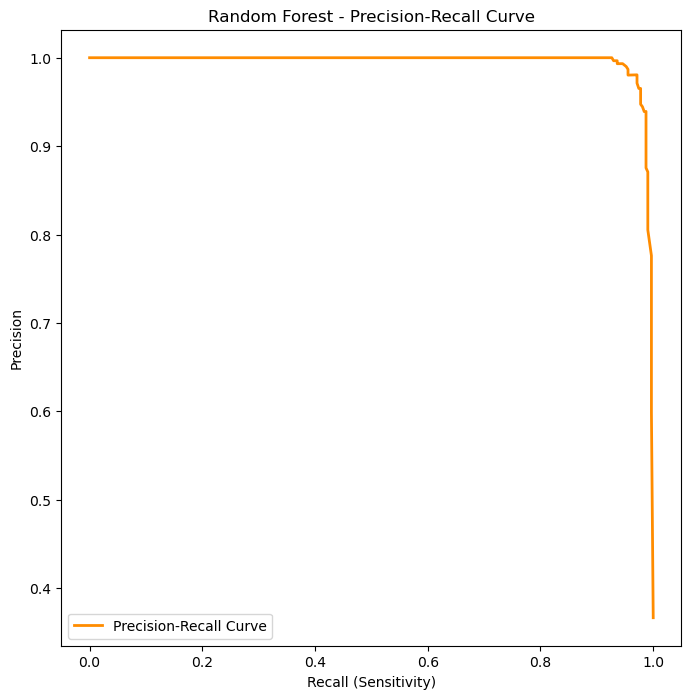

In [31]:
from sklearn.metrics import precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]
y_true = y_test

# Create a precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Random Forest - Precision-Recall Curve')
plt.legend()
plt.show()


Index(['num__income_annum', 'num__loan_amount', 'num__loan_term',
       'num__cibil_score', 'num__luxury_assets_value'],
      dtype='object')


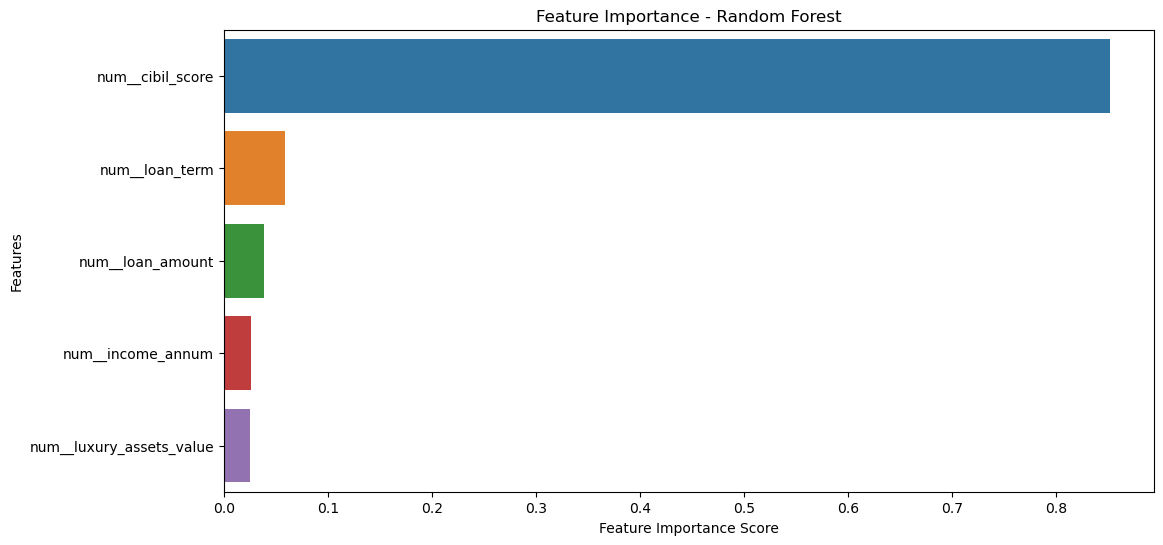

In [32]:
importances = rf_model.feature_importances_
feature_names = X.columns
print(feature_names)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.show()


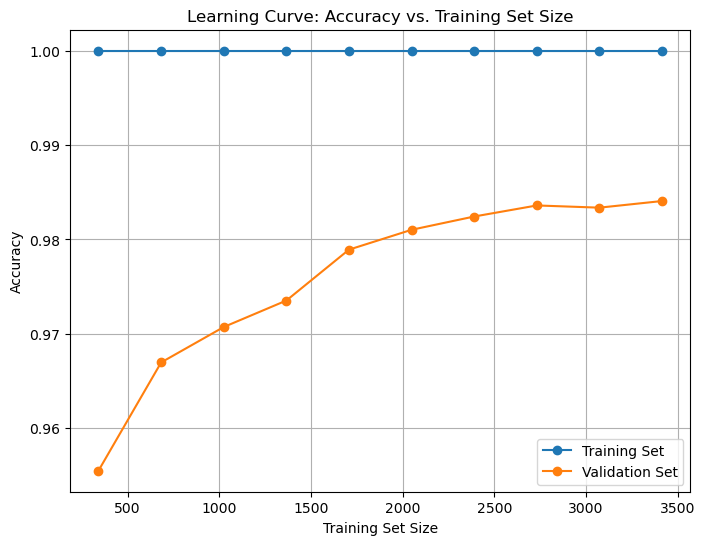

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    """
    Plot a learning curve for a given model.

    Parameters:
    - model: The machine learning model (classifier or regressor)
    - X: Feature matrix
    - y: Target variable
    - train_sizes: Relative or absolute numbers of training set sizes
    - cv: Number of cross-validation folds
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Set', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation Set', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve: Accuracy vs. Training Set Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have a trained model 'rf_model', feature matrix 'X', and target variable 'y'
plot_learning_curve(rf_model, X, y)


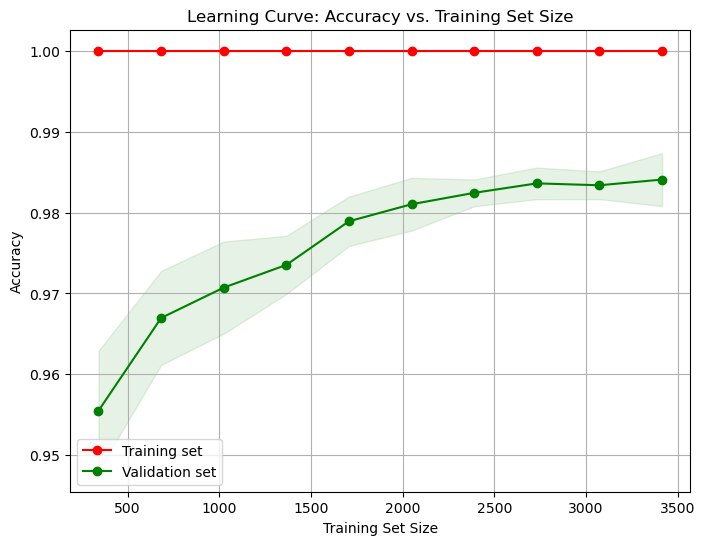

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    """
    Plot a learning curve for a given model.

    Parameters:
    - model: The machine learning model (classifier or regressor)
    - X: Feature matrix
    - y: Target variable
    - train_sizes: Relative or absolute numbers of training set sizes
    - cv: Number of cross-validation folds
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation set")

    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve: Accuracy vs. Training Set Size')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Assuming you have a trained model 'rf_model', feature matrix 'X', and target variable 'y'
plot_learning_curve(rf_model, X, y)


[0 1 0 ... 1 1 0]
0.0
0.01873536299765808


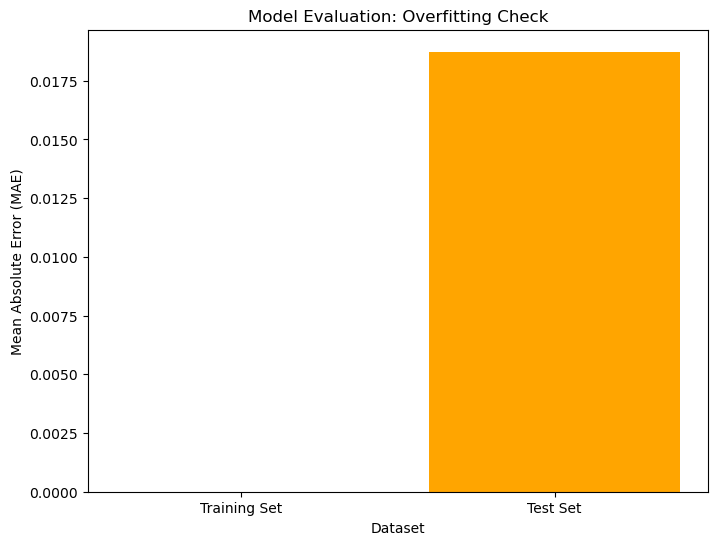

The model may be overfitting to the training set.


In [40]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 3: Test the model on the training and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Step 4: Calculate Mean Absolute Error (MAE) for training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(mae_train)
print(mae_test)

# Step 5: Plot and interpret results
plt.figure(figsize=(8, 6))
plt.bar(['Training Set', 'Test Set'], [mae_train, mae_test], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Evaluation: Overfitting Check')
plt.show()

# Interpretation
if mae_train < mae_test:
    print("The model may be overfitting to the training set.")
elif mae_train > mae_test:
    print("The model may be underfitting or generalizing well.")
else:
    print("The model is performing similarly on both the training and test sets.")


>1, train: 0.953, test: 0.957
>2, train: 0.954, test: 0.956
>3, train: 0.965, test: 0.961
>4, train: 0.968, test: 0.963
>5, train: 0.983, test: 0.968
>6, train: 0.989, test: 0.972
>7, train: 0.992, test: 0.978
>8, train: 0.995, test: 0.982
>9, train: 0.997, test: 0.980
>10, train: 0.998, test: 0.980
>11, train: 0.999, test: 0.984
>12, train: 1.000, test: 0.984
>13, train: 1.000, test: 0.984
>14, train: 1.000, test: 0.984
>15, train: 1.000, test: 0.984
>16, train: 1.000, test: 0.984
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.984
>20, train: 1.000, test: 0.984


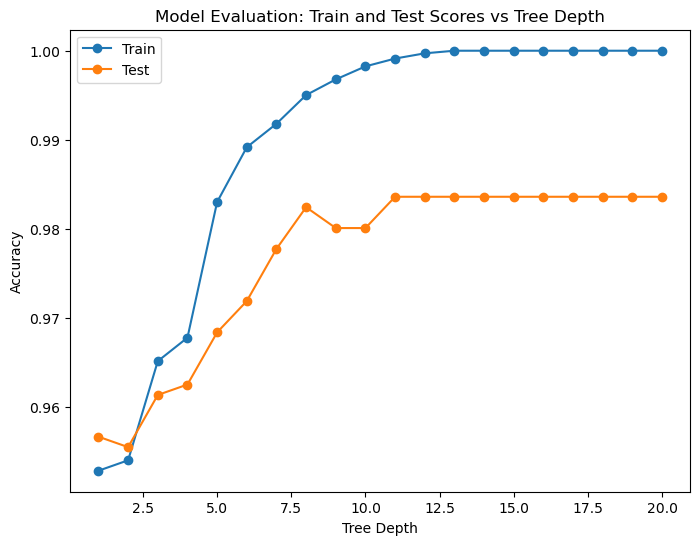

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a feature matrix 'X' and target variable 'y'
# Replace 'selected_features' with the actual features you want to use for prediction
X = data_prepared[selected_features]
y = y.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the range of tree depths you want to evaluate
values = range(1, 21)

train_scores = []
test_scores = []

for i in values:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # Summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plot train and test scores vs tree depth
plt.figure(figsize=(8, 6))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Model Evaluation: Train and Test Scores vs Tree Depth')
plt.legend()
plt.show()
